# Machine Learning 28
## Project :- Test Classification as Spam and Ham, apply this using Naive Bayes Multinomial

### Importing the Dataset

We have Finded the Dataset on which further processing will take place

Dataset :- Spam and Ham <br>
Columns :- label , sms_message

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

### Importing the Dataset 

In [2]:
# using encoding will help to increase the word bank as latin contain more number of words
# This dataset includes the text of SMS messages along with a label indicating whether the message is unwanted
# Therefore, Junk messages are labeled spam, while legitimate messages are labeled ham.
 
df = pd.read_csv(r"K:\Ml Dataset\spam.csv",encoding='latin-1')

In [3]:
x,y=df.shape
print('Number of Rows   : ',x)
print('Number of Columns: ',y)

Number of Rows   :  5572
Number of Columns:  5


In [4]:
df.columns

Index(['label', 'sms_message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
df.head(5)

,label,sms_message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.describe()

,label,sms_message,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   label        5572 non-null   object
 1   sms_message  5572 non-null   object
 2   Unnamed: 2   50 non-null     object
 3   Unnamed: 3   12 non-null     object
 4   Unnamed: 4   6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


**Visualisation of Ham and Spam**

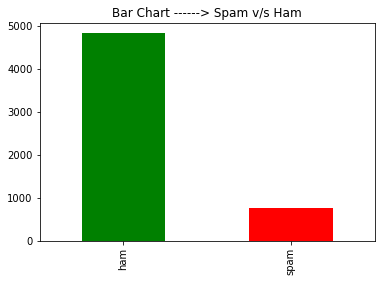

In [8]:
# Visualize Distribution of Messages using Bar Chart

count_class=pd.value_counts(df['label'],sort=True)
count_class.plot(kind='bar',color=['Green','Red'])
plt.title('Bar Chart ------> Spam v/s Ham')
plt.show()

**Encoding**

In [9]:
# Spam and Ham Message
# Mapping label column to integer 0 -> ham and 1 -> spam

df['label'] = df.label.map({'ham':0, 'spam':1})
print(df.shape)
df.head()

(5572, 5)


,label,sms_message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Testing, Training, and Splitting**

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df['sms_message'],df['label'],random_state=1)

In [11]:
print('Number of rows in the total set   : {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(x_train.shape[0]))
print('Number of rows in the test set    : {}'.format(x_test.shape[0]))


Number of rows in the total set   : 5572
Number of rows in the training set: 4179
Number of rows in the test set    : 1393


In [12]:
print('x_train data :\n',x_train)

x_train data :
 710     Height of Confidence: All the Aeronautics prof...
3740                                        2/2 146tf150p
2711    Wen ur lovable bcums angry wid u, dnt take it ...
3155                    Long time. You remember me today.
3748    Dear Voucher Holder 2 claim your 1st class air...
                              ...                        
905     Hey what's up charles sorry about the late reply.
5192    Oh oh... Den muz change plan liao... Go back h...
3980    Huh i cant thk of more oredi how many pages do...
235     I have printed it oh. So  &lt;#&gt;  come upst...
5157                              K k:) sms chat with me.
Name: sms_message, Length: 4179, dtype: object


In [13]:
print('x_test data :\n',x_test)

x_test data :
 1078                             Convey my regards to him
4028             [Û_] anyway, many good evenings to u! s
958     My sort code is  and acc no is . The bank is n...
4642                          Sorry i din lock my keypad.
4674    Hi babe its Chloe, how r u? I was smashed on s...
                              ...                        
3207    Oops my phone died and I didn't even know. Yea...
4655                           K, I'll work something out
1140            Oh:)as usual vijay film or its different?
1793              You bad girl. I can still remember them
1710    (No promises on when though, haven't even gott...
Name: sms_message, Length: 1393, dtype: object


In [14]:
print('y_train data :\n',y_train)

y_train data :
 710     0
3740    1
2711    0
3155    0
3748    1
       ..
905     0
5192    0
3980    0
235     0
5157    0
Name: label, Length: 4179, dtype: int64


In [15]:
print('y_test data :\n',y_test)

y_test data :
 1078    0
4028    0
958     0
4642    0
4674    1
       ..
3207    0
4655    0
1140    0
1793    0
1710    0
Name: label, Length: 1393, dtype: int64


In [16]:
# In order to use textual data for predictive modeling, text must be parsed to remove certain words this process 
# is called tokenization. 

# These words need to then be encoded as integers, or floating-point values, for use as inputs in ML algorithms.

# This process is called feature extraction (or vectorization).

# Scikit-learn’s CountVectorizer is used to convert a collection of text documents to a vector of term/token counts.

# It also enables the pre-processing of text data prior to generating the vector representation.

# This functionality makes it a highly flexible feature representation module for text.

**How Tokenisation Work**

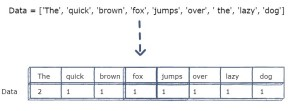

In [17]:
from IPython import display

display.Image(r"C:\Users\kshit\OneDrive\Desktop\Machine Learning\ML after mid term\ML images.jpg")

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(x_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(x_test)

**Applying Naive Bayes**

In [19]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

**Prediction**

In [20]:
predictions = naive_bayes.predict(testing_data)
print('Predicition Values',predictions)

Predicition Values [0 0 0 ... 0 0 0]


**Accuracy, Precision, Recall Score, F1 Score**

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score : ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score   : ', format(recall_score(y_test, predictions)))
print('F1 score       : ', format(f1_score(y_test, predictions)))

Accuracy score :  0.9856424982053122
Precision score:  0.9545454545454546
Recall score   :  0.9333333333333333
F1 score       :  0.9438202247191012


**Testing the Accuracy**

In [22]:
messages = ["Congragulations! You have won a $10,000. Go to https://bit.ly/23343 to claim now.",
            "Nah I don't think he goes to usf, he lives around here though",
            "Get $10 Amazon Gift Voucher on Completing the Demo:- va.pcb3.in/ click this link to claim now",
            "You have won a $500. Please register your account today itself to claim now https://imp.com",
           ]

message_transformed = count_vector.transform(messages)
new_prediction = naive_bayes.predict(message_transformed)

In [23]:
for i in range(len(new_prediction)):
    if new_prediction[i] == 0:
        print('Ham')
        
    else:
        print('Spam.')
    

Spam.
Ham
Spam.
Spam.
